# <center>Breast Cancer Data analysis using Machine Learning

<img src="breast.png" width=1000  height=800 >

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

#### Loading the dataset

In [2]:
df = pd.read_csv('./Breast_cancer_data.csv')
df.sample(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
553,9.333,21.94,59.01,264.0,0.09240,1
31,11.840,18.70,77.93,440.6,0.11090,0
455,13.380,30.72,86.34,557.2,0.09245,1
373,20.640,17.35,134.80,1335.0,0.09446,0
100,13.610,24.98,88.05,582.7,0.09488,0
389,19.550,23.21,128.90,1174.0,0.10100,0
555,10.290,27.61,65.67,321.4,0.09030,1
469,11.620,18.18,76.38,408.8,0.11750,1
117,14.870,16.67,98.64,682.5,0.11620,0
165,14.970,19.76,95.50,690.2,0.08421,1


#### Exploring the data

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df.shape

(569, 6)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


#### checking the null percentage

In [8]:
df.isnull().mean()*100

mean_radius        0.0
mean_texture       0.0
mean_perimeter     0.0
mean_area          0.0
mean_smoothness    0.0
diagnosis          0.0
dtype: float64

#### Chceking duplicate values

In [9]:
df.duplicated().mean()*100

0.0

## Explorartory Data Analysis

### Univariate Analysis

#### Histogram 

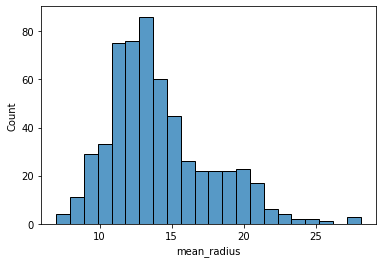

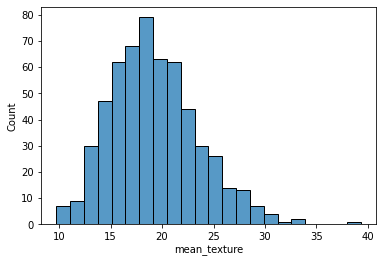

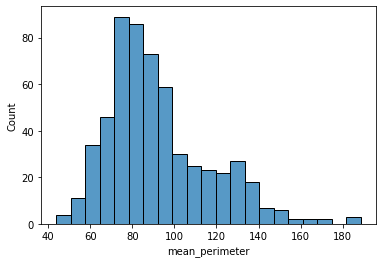

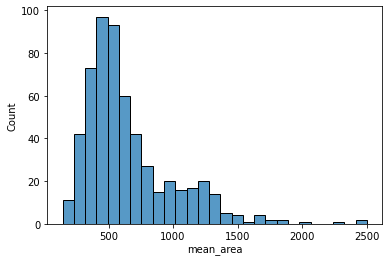

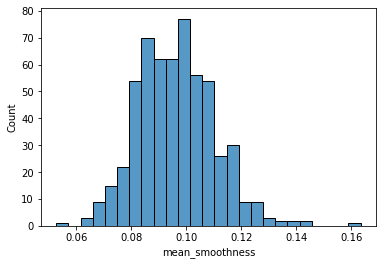

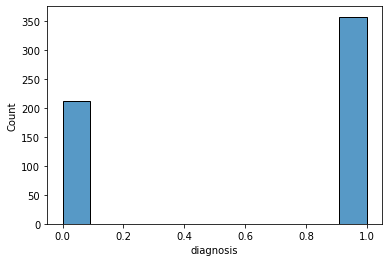

In [10]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

#### Kde Plot

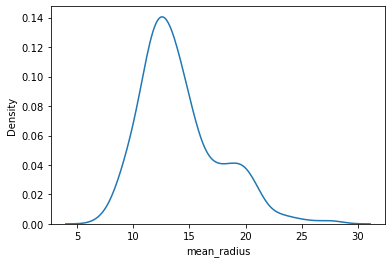

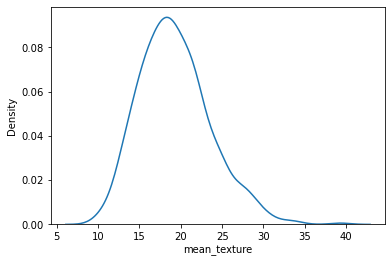

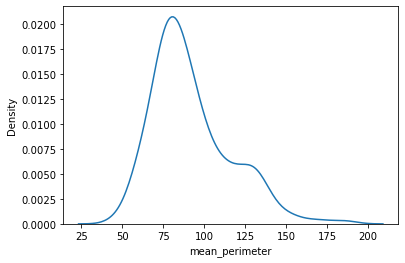

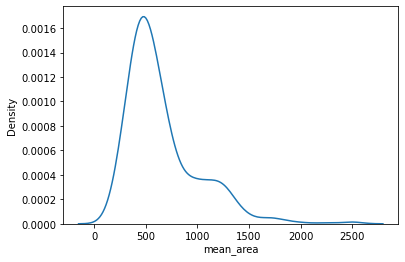

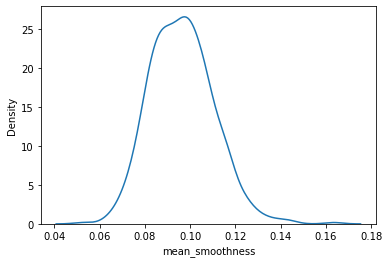

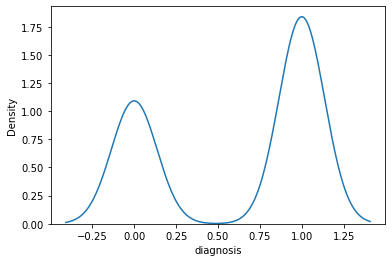

In [11]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

#### Box Plot

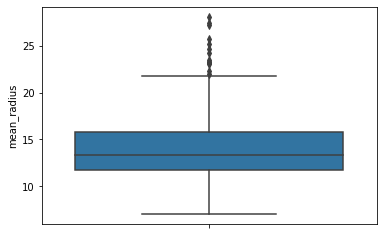

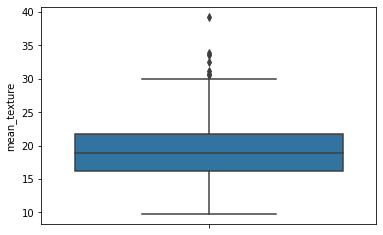

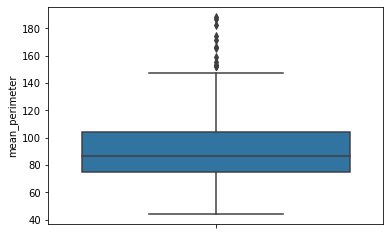

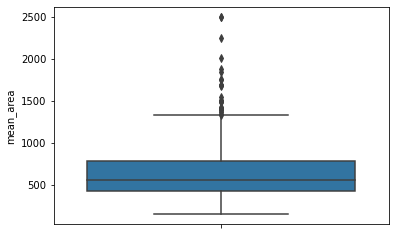

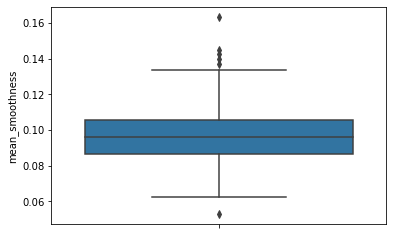

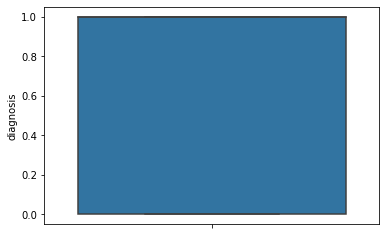

In [12]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i])
        plt.show();

### Multivariate Analysis

#### Bar Chart

In [13]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

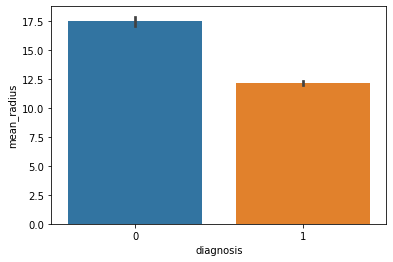

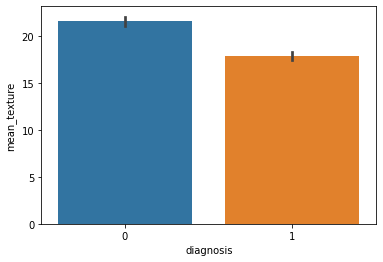

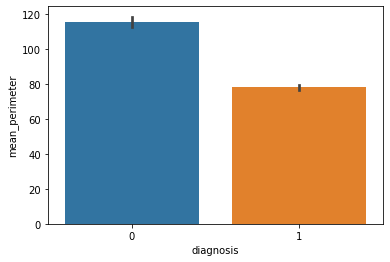

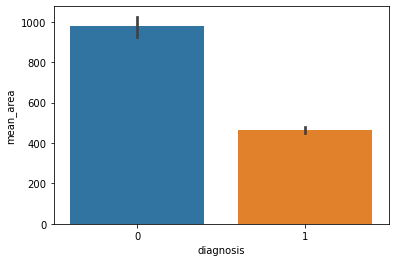

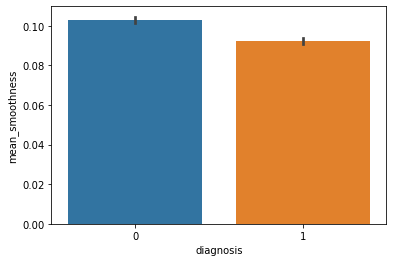

In [16]:
a = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']
for i in a:
    sns.barplot(x="diagnosis",y=df[i],data=df);
    plt.show();

#### Pie Chart

In [17]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

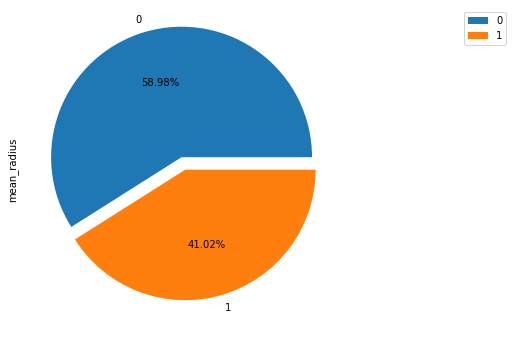

In [18]:
plt.figure(figsize=(14,6))
diabetes_pregnancies=df.groupby(['diagnosis'])['mean_radius'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

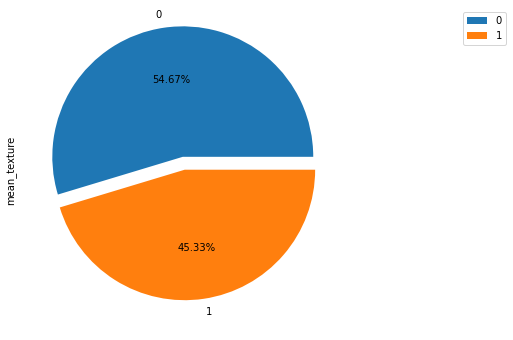

In [19]:
plt.figure(figsize=(14,6))
diagnosis_mean_texture=df.groupby(['diagnosis'])['mean_texture'].mean()
explode=0.1,0
diagnosis_mean_texture.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

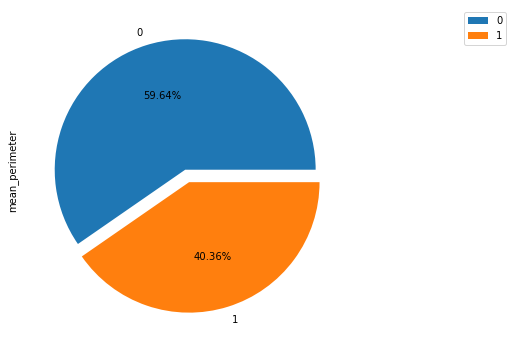

In [20]:
plt.figure(figsize=(14,6))
diagnosis_mean_perimeter=df.groupby(['diagnosis'])['mean_perimeter'].mean()
explode=0,0.1
diagnosis_mean_perimeter.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

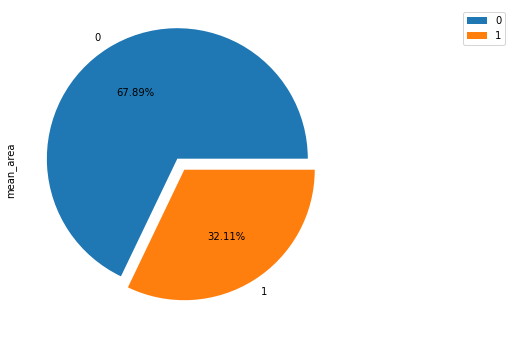

In [21]:
plt.figure(figsize=(14,6))
diagnosis_mean_area=df.groupby(['diagnosis'])['mean_area'].mean()
explode=0.1,0
diagnosis_mean_area.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

#### Pair Plot

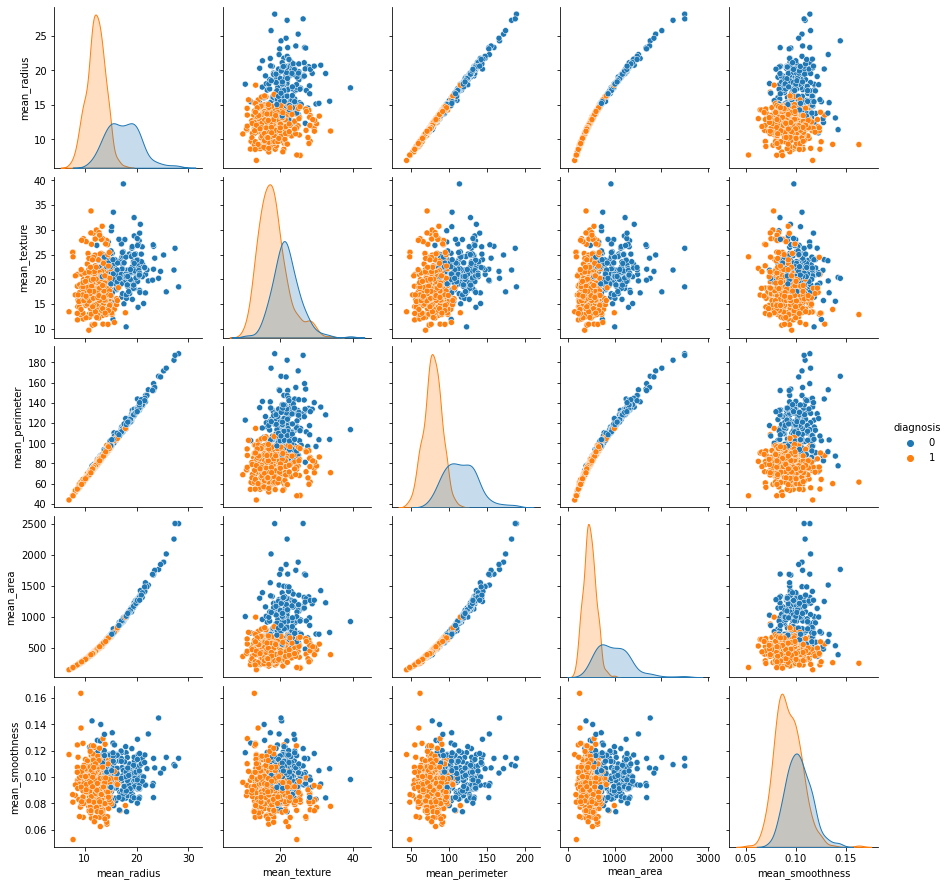

In [24]:
sns.pairplot(data=df,kind="scatter", hue="diagnosis");
plt.show();

#### Scaling

In [33]:
x=df.iloc[:,:-1].values

In [34]:
y=df.iloc[:,-1].values

#### Check whether the data is imbalanced

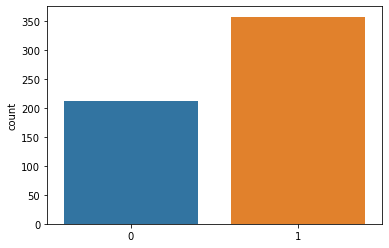

In [35]:
sns.countplot(x=y);

#### We can see that the data is balanced, so we use oversampling

###### Initialize the sampler

In [36]:
over_sampler = RandomOverSampler()

In [37]:
x,y = over_sampler.fit_resample(x,y)

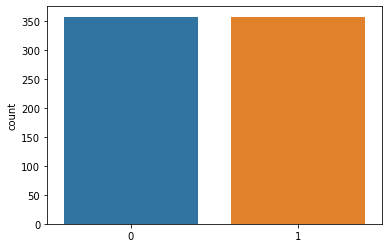

In [38]:
sns.countplot(x=y);

#### we can see now the data is balanced

##### Standarize

In [40]:
sc=StandardScaler()

In [41]:
x=sc.fit_transform(x)

#### Selecting Random Forest classifier

In [42]:
model = RandomForestClassifier()

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.958041958041958
confusion_matrix train is::  [[292   0]
 [  0 279]]
confusion_matrix test is::  [[64  1]
 [ 5 73]]
Wrong Predictions made: 6 / 143
************************************************************


##### Now we can Compare the actual and predicted value

In [45]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT.sample(10)

,ACTUAL,PREDICTION
371,1,1
125,1,1
492,0,0
178,1,1
671,0,0
223,0,0
589,0,0
440,1,1
198,0,0
340,1,1


#### Plotting Confusion Matrix for training and testing

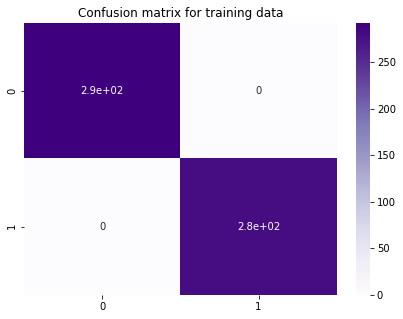

In [57]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='Purples');

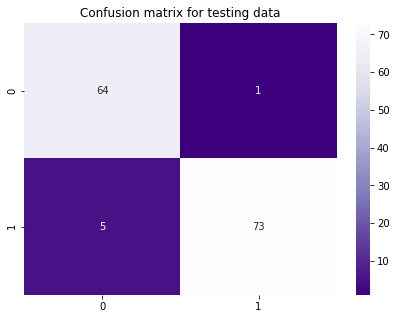

In [59]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='Purples_r');

### Computing ROC and AUC

Model used is :: RandomForestClassifier()


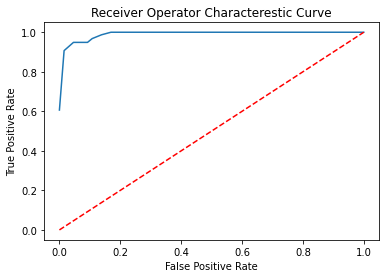

In [61]:
model.fit(x_train,y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
print("Model used is ::",model)
sns.lineplot(x=fpr,y=tpr,ci=None)
plt.plot([0,1],[0,1],color="Red",linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characterestic Curve')
plt.show();